<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/SML_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loaded the Iris dataset using Python's sklearn.datasets.load_iris function.**

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset using sklearn
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column to the DataFrame
iris_data['species'] = iris.target

# Mapping species to their actual names
iris_data['species'] = iris_data['species'].map(dict(enumerate(iris.target_names)))

# Display the first few rows of the dataset to confirm it loaded correctly
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Randomly sample 30 observations from the dataset**

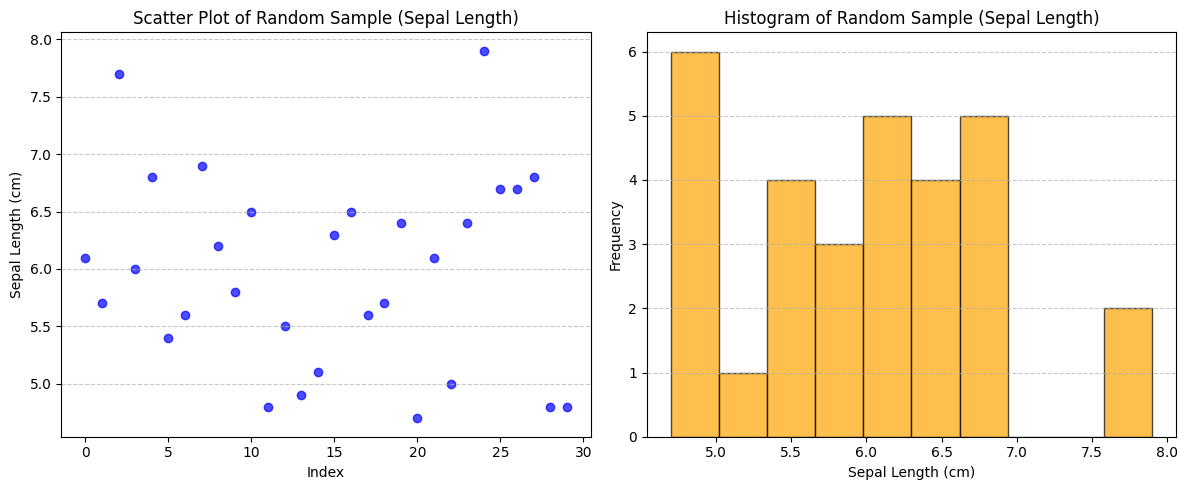

In [11]:
# Perform simple random sampling to select 30 observations
random_sample = iris_data.sample(n=30, random_state=42)

# Display the sampled data
random_sample

# Scatter plot for the simple random sample of 30 observations
plt.figure(figsize=(12, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(random_sample)), random_sample['sepal length (cm)'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Random Sample (Sepal Length)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram
plt.subplot(1, 2, 2)
plt.hist(random_sample['sepal length (cm)'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Random Sample (Sepal Length)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


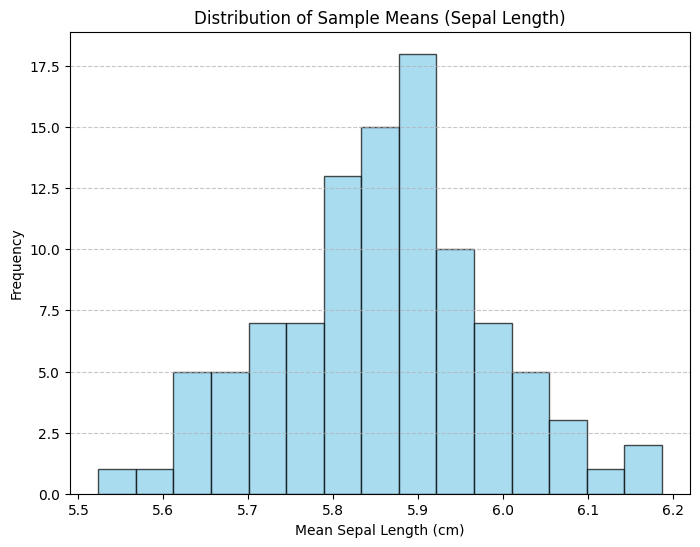

In [6]:
import matplotlib.pyplot as plt

# Initialize a list to store the sample means
sample_means = []

# Repeat random sampling 100 times
for _ in range(100):
    sample = iris_data.sample(n=30, random_state=_)
    sample_mean = sample['sepal length (cm)'].mean()
    sample_means.append(sample_mean)

# Plot the distribution of the sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (Sepal Length)')
plt.xlabel('Mean Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Perform Sample Mean Distribution Analysis:**
1. Repeat the random sampling 100 times, each time calculating the mean sepal length.
2. Plot the distribution of these 100 sample means using a histogram.

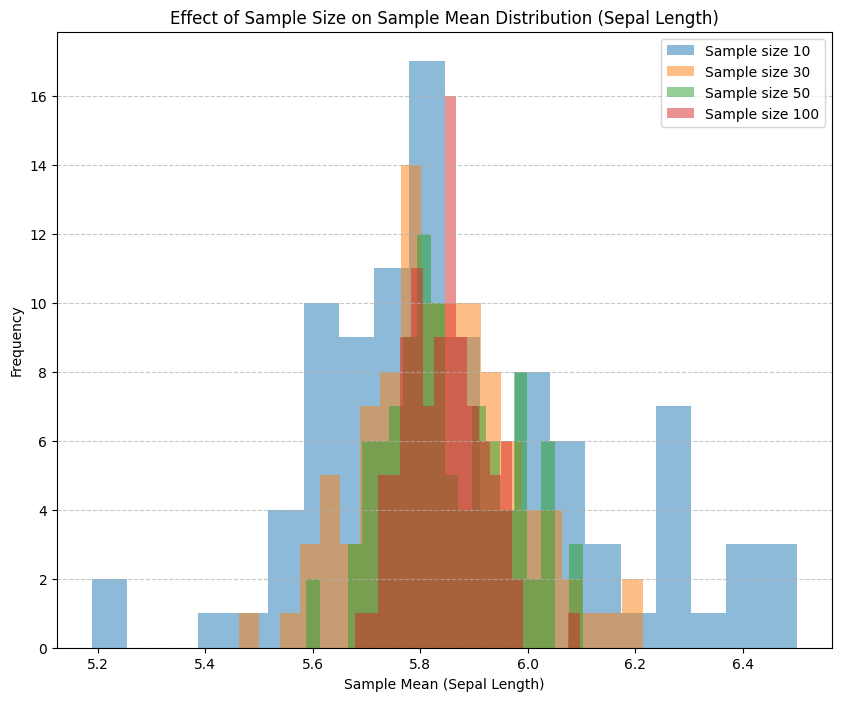

In [9]:
# Define a list of different sample sizes to demonstrate the Central Limit Theorem
sample_sizes = [10, 30, 50, 100]

# Generate sample means for sepal length for each sample size
sample_means = {
    size: [iris_data['sepal length (cm)'].sample(size, replace=True).mean() for _ in range(100)]
    for size in sample_sizes
}

# Plotting the results
plt.figure(figsize=(10, 8))
for size, means in sample_means.items():
    plt.hist(means, alpha=0.5, bins=20, label=f'Sample size {size}')

plt.legend()
plt.title('Effect of Sample Size on Sample Mean Distribution (Sepal Length)')
plt.xlabel('Sample Mean (Sepal Length)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Randomly Sampled Dataset (20%)**

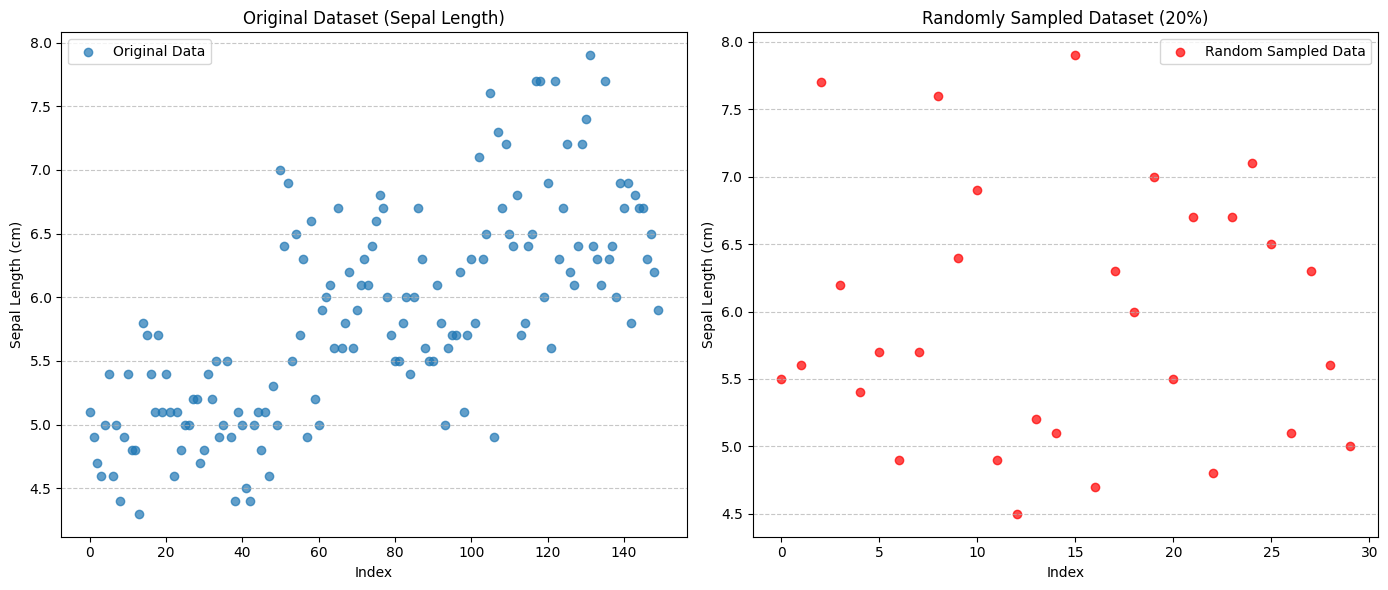

In [8]:
# Define a function for random sampling of 20% of the dataset
def random_sample_fraction(data, fraction):

    sample_size = int(len(data) * fraction)
    return data.sample(n=sample_size, random_state=None)

# Perform random sampling of 20% of the dataset
sampled_data_random = random_sample_fraction(iris_data, fraction=0.2)

# Plot the original dataset vs random sampled dataset
plt.figure(figsize=(14, 6))

# Plot original dataset
plt.subplot(1, 2, 1)
plt.scatter(range(len(iris_data)), iris_data['sepal length (cm)'], alpha=0.7, label='Original Data')
plt.title('Original Dataset (Sepal Length)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot random sampled dataset
plt.subplot(1, 2, 2)
plt.scatter(range(len(sampled_data_random)), sampled_data_random['sepal length (cm)'], color='red', alpha=0.7, label='Random Sampled Data')
plt.title('Randomly Sampled Dataset (20%)')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
